# Data Wrangling Part 1: EDA

One of the most (perhaps the most) important parts of doing machine learning on real data, is taking that real world data and turning into *high quality* data for training your machine learning to make the predictions you want. Like many other aspects of programming, in ML it's garbage in garbage out. If you feed your ML model bad data, it will do much more poorly than it would if you feed it good quality data. This means that collecting good data is important, and cleaning that data up is important. It's said that these two tasks eat up 90% of a data scientist's time, and I quite agree.

The purpose of this series of tutorials will be to show an example of how to take messy real-world data, analyze it, clean it up, and turn it into something you can train a high quality ML model on. The example I will use is the Titanic dataset, which is a well-known messy dataset that's popular on Kaggle for intro-level challenges. Most analysis and data cleaning will be done using the pandas library, which is built for doing stuff like data cleaning intuitively and efficiently.

This first tutorial in the series will focus on exploratory data analysis (EDA). This aspect of data wrangling involves looking at your data to see what's what. Some questions you might want to be looking for as you do EDA are these:
- How much data do you have (do you need big data approaches or not?) 
- What are the examples (rows)?
- What are the attributes (columns)?
- What datatypes are the attributes (numerical, ordinal, low-dimensional categorical, high-dimensional categorical)?
- Are there any useless attributes (e.g. an ID column, or a column that's all or almost all the same value)?
- Are there any missing values? 
- Are there any duplicate values?
- In the categorical columns, how balanced are the categories in the dataset?
- In the numerical columns, what is the mean and standard deviation in the data?
- Are any of the attributes correlated, and if so how strongly?

Let's begin by importing the 4 main packages we'll use: numpy, pandas, matplotlib, and seaborn. I'll also set a seed for good measure.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(123)

The Titanic dataset can be found at the link [here](https://gist.githubusercontent.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/fa71405126017e6a37bea592440b4bee94bf7b9e/titanic.csv). I'll save this link as a string, and then use `pd.read_csv` to load it into a pandas dataframe. As usual, it's also work inspecting the input to make sure everything loaded correctly. After this I'll call `df.info()` to do an inspection of the data types.

In [2]:
url = 'https://gist.githubusercontent.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/fa71405126017e6a37bea592440b4bee94bf7b9e/titanic.csv'
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Based on a quick inspection, it looks like everything loaded correctly. We can see that there are 891 examples (rows) in this dataset and 12 attributes (columns). Also note the memory usage of 83.7 kB is quite low, indicating we should have no problem doing data cleaning operations in memory.

Looking at the dataframe head and info, we can infer some things.
- Each example in the dataset is a person who was on board the [Titanic](https://en.wikipedia.org/wiki/Titanic).
- Each column in the dataset is some attribute about that person:
    - `PassengerId`: An ID number for each person, probably given after the fact when saving the data
    - `Survived`: Whether they survived the sinking
    - `Pclass`: What class their ticket was
    - `Name`: Their name, in what appears to be last name, first name, title format
    - `Sex`: Sex
    - `Age`: Age
    - `Ticket`: Ticket number
    - `Fare`: Cost of fare in unknown currency
    - `Cabin`: Cabin number
    - `Embarked`: City they embarked from
- There are also two other attributes that are less obvious, `SibSp` and `Parch`, which we can look into later.
- Some attributes have missing values: `Age`, `Cabin`, `Embarked`. We may need to drop or impute these, depending.
- The attributes have a mix of different formats: `int64` (an integer value), `float64` (a floating point value), and `object` (usually strings or more exotic data types).

The next thing we might want to do is check to see whether the Passenger IDs are in fact unique. If they are, then that column is pointless given that we already have an index, and so we can drop it from the dataframe. It looks like there are 891 unique IDs, which exactly matches the number of rows in the dataset. We can thus drop this column and lose no information.

In [6]:
df['PassengerId'].unique().size

891

In [9]:
df = df.drop(columns='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Next let's look at the survived column. For the purposes of this tutorial, we'll assume the main use of this data will be to build a model to predict passenger survival. That means that `Survived` will end up being our labels. Given that a passenger either survived or didn't, we should expect this column to contain only 2 values, one meaning "survived" and the other "did not survive". It looks like this dataset encoded these values with the integers 0 and 1. Let's check to make sure these are the *only* values in that column. It appears so.

In [10]:
df['Survived'].unique()

array([0, 1])

Another problem however is that we don't know which integer represents "survived", 0 or 1? To figure this out it may be best to google the number of survivors from the Titanic and compare it with the value counts for each label. We have 549 `0` examples and 342 `1` examples. From googling, it looks like about 2/3 of the people on board did not survive. Using this, we can infer that the `0` label means "did not survive" and `1` means "survived".

Since this is our vector of labels, it's worth noting that this dataset is imbalanced, with 66.6% negative examples and 33.4% positive samples. We will need to take this fact into account when deciding which metrics to use and (perhaps) whether we use any re-sampling techniques.

In [11]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Having taken care of the `Survival` column, let's now look at `Pclass`. It appears there are 3 integer values it can take on: `1`, `2`, `3`. These categories aren't equally distributed either, with most examples in the data having category `Pclass = 3`. Assuming this column refers to "class" in the sense of how good the accomodations the passenger had, this imbalance makes sense. For example, on a plane flight you'd expect more "economy" tickets than "business" tickets than "first class" tickets.

In [12]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Moving on, the `Name` column obviously contains strings, and contains a lot of data that we may wish to feature engineer later on. I'll come back to this one later. After that, we have `Sex`, which should obviously only have 2 values (but we'll make sure just in case). We can see that it's encoded as strings: `male` and `female`. Looking at the value counts, about 2/3 of the passengers appear to be male and the remaining 1/3 female. Later we'll want to encode this column in a different format, e.g. 0 and 1.

In [13]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Next we have `Age`. This is clearly an ordinal/numerical variable, in that it's clear we can say things like 20 < 21 < 22. It thus makes more sense in this column to not look at value counts, but to make sure that all values are in fact numerical and taking on sensible values for ages (e.g. 1-100).

We can use `df.describe()` to get some quick statistics. Some comments:
- There are only 714 of 891 non-null values, meaning there are missing age values we'll need to deal with
- The min age is 0.42, which suggests that they've encoded months for some people rather than only years
- The max age is 80, which makes sense
- The percentiles are 25%: 20.125 (20 and 1.5 months), 50%: 28, 75%: 38
- The mean age is about 29.7 years, which along with the percentiles is suggesting the age distribution is skewing younger a bit

In [15]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

It also may be useful to look at the actual age distribution as a histogram. We can do that quickly using `df.hist()`. Looking at the age distribution below, we can see that the passengers indeed did skew younger with a mode around age 20. There's also a long tail to the right, which indicates the distribution is skewed.

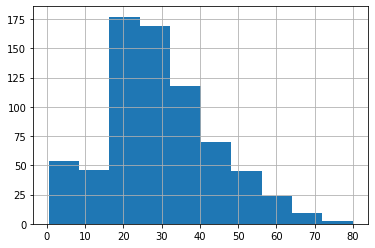

In [17]:
df['Age'].hist();

Next, we have the mysterious `SibSp` column. It's hard to say from looking at the dataframe itself whether this column is numerical or categorical. We can look at the value counts to see that there are evidently 6 distinct values, indicating that this column is *probably* categorical (but we don't know for sure). It appears there are no missing or oddly typed values. The dataset also appears to be heavily skewed towards lower values of `SibSp`.

In [19]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

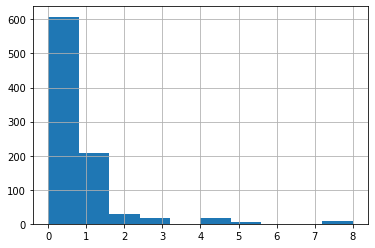

In [21]:
df['SibSp'].hist();

Next, we have `Parch`. This one also appears to maybe be categorical, with 7 categories, and the distribution strongly skewed to lower values. Did the dataset creator sort these categories by value count, or is this really a numerical column?

In [22]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

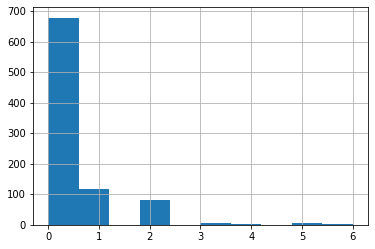

In [23]:
df['Parch'].hist();

Next, we have `Ticket`. This column appears to be encoded as a string, with a lot of variation in the values, meaning it's high-dimensional categorical. Like `Name`, let's come back to this later when we consider feature engineering.

After this we have `Fare`. This appears to be the ticket cost for that passenger. Given that these are numerical, it makes sense to look at the statistics and the histogram. It looks like the mean ticket price was 32.20 (in some currency unit), with a lot of variation as there is a std of 49.69. It also appears somebody got a free ticket, and somebody paid an astounding 512.33 for a ticket. The distribution is heavily skewed mainly because of the outlier 512.33 ticket.

In [24]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<AxesSubplot:>

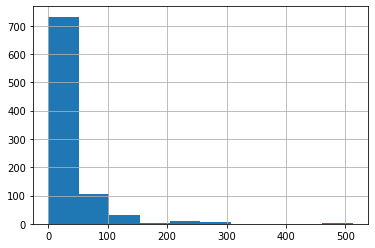

In [25]:
df['Fare'].hist()

Next we have `Cabin`. This appears to be another string column, meaning high-dimensional categorical data that we'll need to feature engineer. It also looks like most values in this column are missing, as there are only 204 valid entries.

In [31]:
(1 - df['Cabin'].isna()).sum()

204

In [32]:
df['Cabin'].value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
D              3
E101           3
              ..
C54            1
E77            1
A32            1
B73            1
C103           1
Name: Cabin, Length: 147, dtype: int64

Last we have `Embarked`, which looks like strings but appears more likely to be low-dimensional categorical given that they're single letter strings, and given that "embarked" strongly suggests this column refers to which port that passenger embarked from (and it's unlikely there are many such ports here). We can check by looking at the value counts.

It looks like there are 3 ports: `S`, `C`, and `Q`. Most passengers took off from `S`. There appear to be only 3 missing values in this column.

In [33]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Now that we've seen what each column seems to be doing, let's see which ones might be useful predictors of survival. We can do this by looking at plots of each column vs the survival column. Only thing is we need to distinguish between numerical and categorical variables here. For numerical variables we'll want to look at something like a scatter plot (or box plot). For categorical variables we'll want to look at something like a cross tab (or heat map).

To do this, it helps to break up the dataframe into the target column `Survival`, the categorical columns, and the numerical columns. I'll ignore the high-dimensional string columns `Name`, `Ticket`, `Cabin` for now since they're more tricky.

In [34]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [58]:
target = 'Survived'
categories = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
numericals = ['Age', 'Fare']

Let's first look at the categorical variables. Below I loop through each categorical variable and print out the cross tab of each categorical variable vs the target variable `Survived`. A cross tab is basically just a table showing the total counts (or percentage) in the data for each input-output possiblity. For example, in the first cross tab table below (`Survived` vs `Pclass`): Of the data samples with `Pclass = 1`, 37% had `Survival = 0` and the remaining 63% had `Survival = 1`. Of the data samples with `Pclass = 2`, 53% had `Survival = 0` and the remaining 47% had `Survival = 1`. Finally, of the data samples with `Pclass = 3`, 76% had `Survival = 0` and the remaining 24% had `Survival = 1`.

Let's look at each cross tab table and see what they're telling us.
- For `Pclass` vs `Survived`: We can see that the class with the most survivors was `Pclass = 1` at 63% survived. The class with the least survivors was `Pclass = 3` at only 24% survived. This suggests that `Pclass` and `Survived` correlate pretty strongly. The lower your class number the more likely you are to survive. It's important to note though that most passengers were `Pclass = 3`, which may skew things here.
- For `Sex` vs `Survived`: We can see that 74% of females survived and only 19% of males survived. This sugggests `Sex` and `Survived` also correlate pretty strongly. It appears that females were given priority in boarding the survival rafts vs men, who were left behind to sink with the ship.
- For `SibSp` vs `Survived`: It appears that examples with higher `SibSp` values tended to survive more than those with lower values. However, recall from above that this column is heavily skewed to lower values, so this could be a fluke.
- For `Parch` vs `Survived`: It appears that examples with higher `Parch` values tended to survive more than those with lower values. However, recall from above that this column is heavily skewed to lower values, so this could be a fluke.
- For `Embarked` vs `Survived`: Though it isn't that pronounced, it seems like passengers who embarked from port `C` were more likely than not to survive, while passengers embarking from the other 2 ports were more likely to not survive. But do recall that by far most passengers embarked from port `S`.

In [74]:
for category in categories:
    crosstab = pd.crosstab(df[category], df[target]).apply(lambda r: round(r/r.sum(), 2), axis=1)
    print(crosstab)
    print('--------------------')

Survived     0     1
Pclass              
1         0.37  0.63
2         0.53  0.47
3         0.76  0.24
--------------------
Survived     0     1
Sex                 
female    0.26  0.74
male      0.81  0.19
--------------------
Survived     0     1
SibSp               
0         0.65  0.35
1         0.46  0.54
2         0.54  0.46
3         0.75  0.25
4         0.83  0.17
5         1.00  0.00
8         1.00  0.00
--------------------
Survived     0     1
Parch               
0         0.66  0.34
1         0.45  0.55
2         0.50  0.50
3         0.40  0.60
4         1.00  0.00
5         0.80  0.20
6         1.00  0.00
--------------------
Survived     0     1
Embarked            
C         0.45  0.55
Q         0.61  0.39
S         0.66  0.34
--------------------


Now let's look at the 2 numerical columns 'Age' and 'Fare'. I make a scatter plot of each of these against `Survived`. Reading these plots can be a little tricky if you're not used to it. Here's what you do. For each "level" of y, see whether the x values at that level tend to skew significantly more left (or right) than the values at the other levels of y. If, for example, you see that values at `y = 0` skew far to the left, while the values at `y = 1` skew far to the right, then you can infer that there is a strong positive correlation between x and y. This is essentially what logistic regression does is try to fit such curves with a sigmoid function.

Back to the data at hand, it doesn't appear to me that there's any clear correlation between `Survival` and either `Age` or `Fare`. No obvious skewing between levels is showing up. Thus, it seems to me that both variables are only weakly correlated with the survival, if at all.

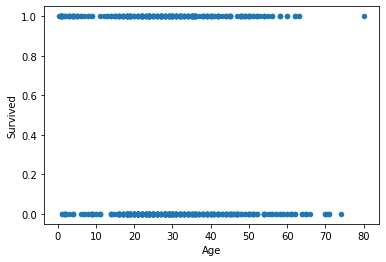

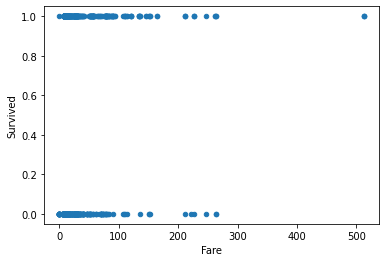

In [72]:
for numerical in numericals:
    df.plot.scatter(x=numerical, y=target)
    plt.show()

That's it for the EDA section of this series. In the follow-up tutorial we'll set out to clean this data up for doing ML, and then do some feature engineering before we run the data against some classification models to test predictions.